# Reading the DataSet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("SBUX.US_D1.csv")

In [3]:
data.shape

(6639, 6)

In [4]:
data=data.drop_duplicates()
print('Shape After deleting duplicate values:', data.shape)

Shape After deleting duplicate values: (6639, 6)


In [5]:
# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
data.head(10)

,datetime,open,high,low,close,volume
0,1998-01-02,38.38,38.63,37.31,37.50,594000
1,1998-01-05,37.63,37.78,36.75,37.13,644000
2,1998-01-06,37.13,37.38,35.56,35.63,1183300
3,1998-01-07,35.50,36.44,34.25,34.69,2039005
4,1998-01-08,34.56,36.01,34.00,35.76,1638105
5,1998-01-09,35.75,36.01,34.37,35.13,713703
6,1998-01-12,34.50,35.37,34.25,35.19,855603
7,1998-01-13,35.38,35.63,35.00,35.56,460200
8,1998-01-14,35.63,35.63,35.07,35.19,336200
9,1998-01-15,35.13,35.26,33.75,34.00,742700


# Problem Statement Definition

To develop a prediction model based on previous stock price data and potentially additional relevant attributes that can accurately estimate Starbucks' future stock price.

In [6]:
target_variable = 'stock_price'

<Axes: >

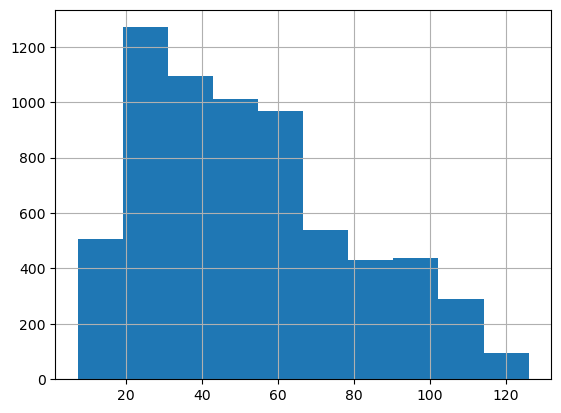

In [7]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the MEDV values
data['close'].hist()

In [8]:
data.head()  # Display first few rows of the dataset

,datetime,open,high,low,close,volume
0,1998-01-02,38.38,38.63,37.31,37.50,594000
1,1998-01-05,37.63,37.78,36.75,37.13,644000
2,1998-01-06,37.13,37.38,35.56,35.63,1183300
3,1998-01-07,35.50,36.44,34.25,34.69,2039005
4,1998-01-08,34.56,36.01,34.00,35.76,1638105


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6639 entries, 0 to 6638
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  6639 non-null   object 
 1   open      6639 non-null   float64
 2   high      6639 non-null   float64
 3   low       6639 non-null   float64
 4   close     6639 non-null   float64
 5   volume    6639 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 363.1+ KB


In [10]:
data.describe()

,open,high,low,close,volume
count,6639.000000,6639.000000,6639.000000,6639.000000,6.639000e+03
mean,52.025905,52.605072,51.438399,52.034272,5.793768e+06
std,27.161870,27.312972,26.994025,27.155434,4.658699e+06
min,7.520000,7.900000,7.060000,7.200000,3.000000e+02
25%,29.735000,30.130000,29.290000,29.665000,2.875130e+06
50%,49.340000,50.000000,48.660000,49.400000,4.693841e+06
75%,71.500000,72.215000,70.680000,71.390000,7.301760e+06
max,126.080000,126.320000,124.810000,126.060000,7.234445e+07


In [18]:
data.nunique()

datetime    6639
open        4356
high        4370
low         4301
close       4417
volume      6623
dtype: int64

# Identifying and Rejecting useless columns


In [36]:
useless_columns = ['datetime']  # Assuming 'Date' column is not useful for prediction
data = data.drop(columns=useless_columns)

# Visual Exploratory Data Analysis of data


array([[<Axes: title={'center': 'open'}>,
        <Axes: title={'center': 'high'}>],
       [<Axes: title={'center': 'low'}>,
        <Axes: title={'center': 'close'}>],
       [<Axes: title={'center': 'volume'}>, <Axes: >]], dtype=object)

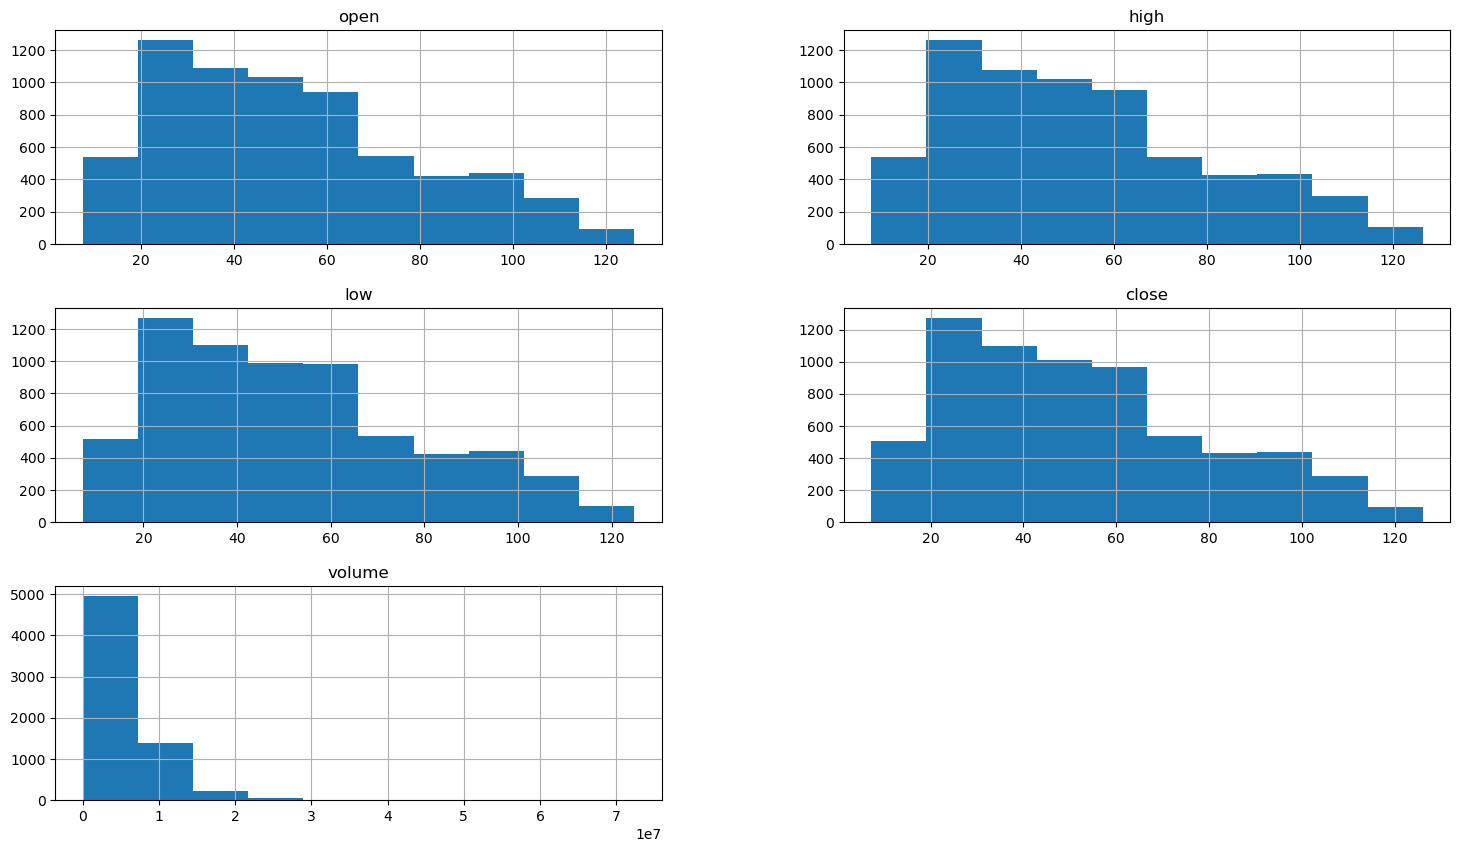

In [19]:
data.hist(['datetime','open','high','low','close','volume'], figsize=(18,10))

In [38]:
data = data.dropna() # remove missing value

there are no outliers

In [25]:
data.isnull().sum()

datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

# Visual and Statistic Correlation analysis for selection of best features

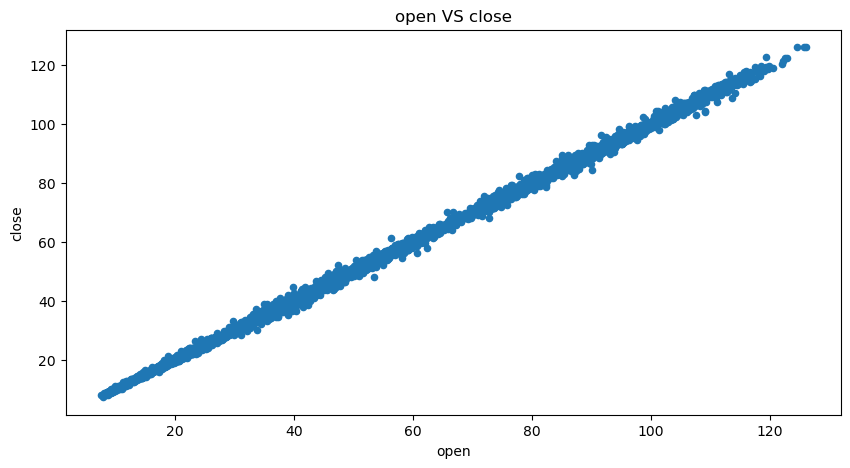

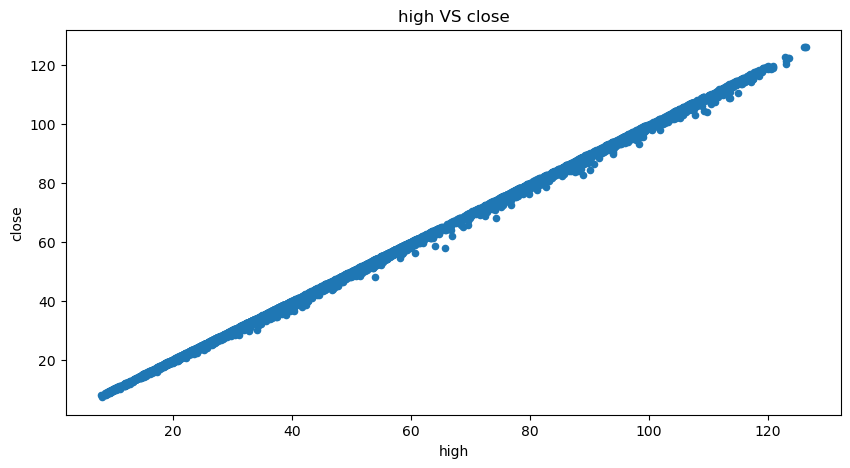

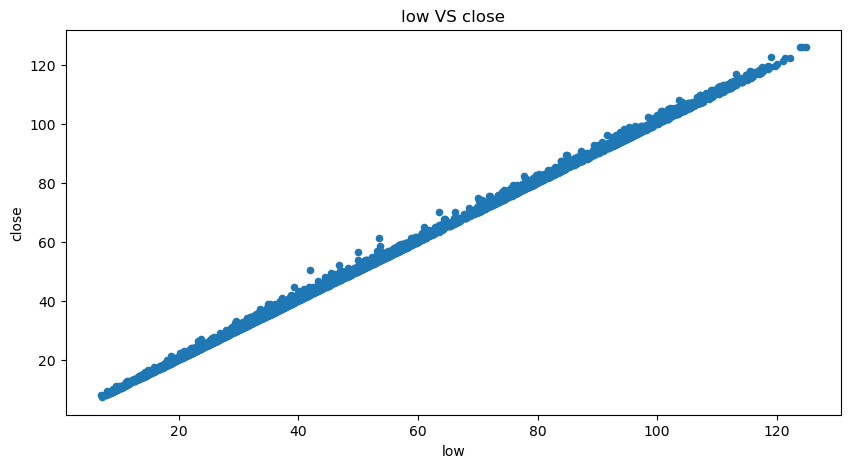

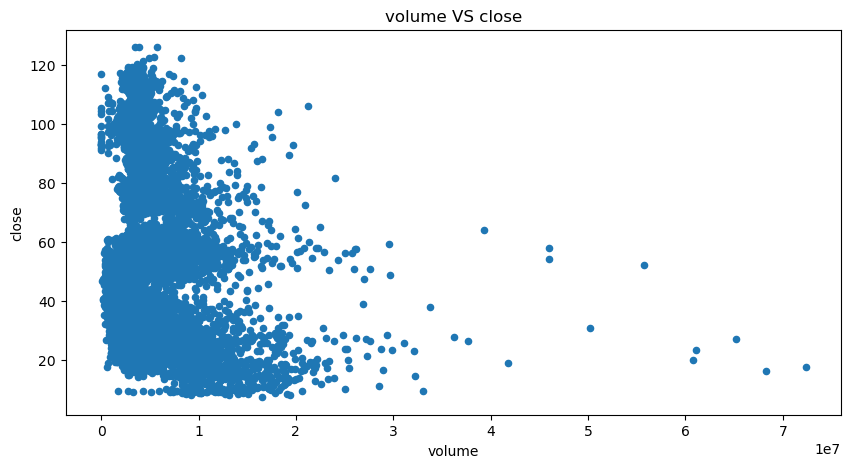

In [27]:
ContinuousCols=['open', 'high', 'low','volume']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    data.plot.scatter(x=predictor, y='close', figsize=(10,5), title=predictor+" VS "+ 'close')

In [30]:
ContinuousCols=['open', 'high', 'low','close','volume']

# Creating the correlation matrix
CorrelationData=data[ContinuousCols].corr()
CorrelationData

,open,high,low,close,volume
open,1.000000,0.999763,0.999742,0.999524,-0.191927
high,0.999763,1.000000,0.999640,0.999770,-0.189593
low,0.999742,0.999640,1.000000,0.999762,-0.194200
close,0.999524,0.999770,0.999762,1.000000,-0.191477
volume,-0.191927,-0.189593,-0.194200,-0.191477,1.000000


In [31]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['close'][abs(CorrelationData['close']) > 0.5 ]

open     0.999524
high     0.999770
low      0.999762
close    1.000000
Name: close, dtype: float64

# Selecting final Features for building Machine learning model

In [39]:
SelectedColumns=['open', 'high', 'low','close']

# Selecting final columns
DataForML=data[SelectedColumns]
DataForML.head()

,open,high,low,close
0,38.38,38.63,37.31,37.50
1,37.63,37.78,36.75,37.13
2,37.13,37.38,35.56,35.63
3,35.50,36.44,34.25,34.69
4,34.56,36.01,34.00,35.76


In [40]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

# Converting the nominal variable to numeric using get_dummies()

In [41]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['close']=data['close']

# Printing sample rows
DataForML_Numeric.head()

,open,high,low,close
0,38.38,38.63,37.31,37.50
1,37.63,37.78,36.75,37.13
2,37.13,37.38,35.56,35.63
3,35.50,36.44,34.25,34.69
4,34.56,36.01,34.00,35.76


In [42]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['open', 'high', 'low', 'close'], dtype='object')

In [79]:
#Separate Target Variable and Predictor Variables
TargetVariable='close'
Predictors=['open', 'high', 'low']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Training/Testing Sampling and K-fold cross validation

In [80]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split,KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [81]:
# Apply K-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [82]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4647, 3)
(4647,)
(1992, 3)
(1992,)


# Investigating multiple Regression algorithms

In [83]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['close']-TestingDataResults['Predictedclose']))/TestingDataResults['close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9998091523732308

##### Model Validation and Accuracy Calculations ##########
    open   high    low  close  Predictedclose
0  17.42  18.25  17.40  18.23            18.0
1  92.66  92.73  91.73  92.71            92.0
2  89.28  89.82  88.85  89.77            89.0
3  53.18  53.58  52.95  53.01            53.0
4  40.19  40.50  39.50  40.25            40.0
Mean Accuracy on test data: 99.09826578694874
Median Accuracy on test data: 99.35248929780067

Accuracy values for 10-fold Cross Validation:
 [98.95198403 99.15691543 99.5142357  99.45834753 99.18057654 99.54186981
 99.6078107  99.67039986 99.52543805 99.55595336]

Final Average Accuracy of the model: 99.42


# Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9983235799021831

##### Model Validation and Accuracy Calculations ##########
    open   high    low  close  Predictedclose
0  17.42  18.25  17.40  18.23            16.0
1  92.66  92.73  91.73  92.71            92.0
2  89.28  89.82  88.85  89.77            88.0
3  53.18  53.58  52.95  53.01            53.0
4  40.19  40.50  39.50  40.25            41.0
Mean Accuracy on test data: 97.085209459134
Median Accuracy on test data: 98.28760192023594

Accuracy values for 10-fold Cross Validation:
 [97.2189049  95.13873531 97.68830545 95.24226674 79.81379674 98.20463619
 98.66275864 98.15405802 98.27014902 98.11935119]

Final Average Accuracy of the model: 95.65


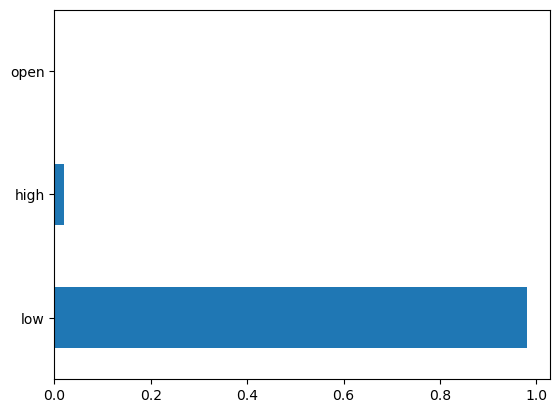

In [84]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['close']-TestingDataResults['Predictedclose']))/TestingDataResults['close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.9961310879914882

##### Model Validation and Accuracy Calculations ##########
    open   high    low  close  Predictedclose
0  17.42  18.25  17.40  18.23            15.0
1  92.66  92.73  91.73  92.71            94.0
2  89.28  89.82  88.85  89.77            88.0
3  53.18  53.58  52.95  53.01            54.0
4  40.19  40.50  39.50  40.25            42.0
Mean Accuracy on test data: 95.3120630403542
Median Accuracy on test data: 97.59896655274595

Accuracy values for 10-fold Cross Validation:
 [96.08604897 92.12407288 96.40396828 92.66983729 73.01894768 97.75176792
 97.96787687 97.52824708 97.55694181 97.33088552]

Final Average Accuracy of the model: 93.84


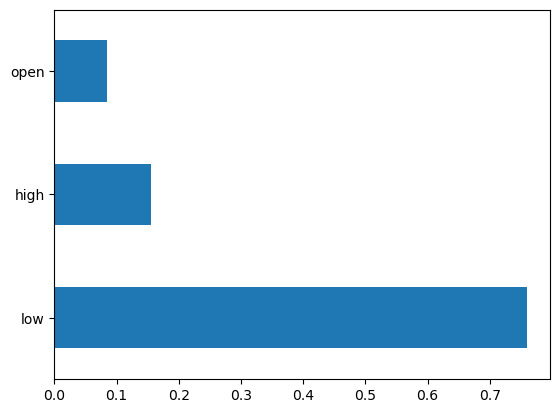

In [85]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['close']-TestingDataResults['Predictedclose']))/TestingDataResults['close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)


C:\Users\leosa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R2 Value: 0.9874200028386855

##### Model Validation and Accuracy Calculations ##########
    open   high    low  close  Predictedclose
0  17.42  18.25  17.40  18.23            18.0
1  92.66  92.73  91.73  92.71            97.0
2  89.28  89.82  88.85  89.77            84.0
3  53.18  53.58  52.95  53.01            56.0
4  40.19  40.50  39.50  40.25            44.0
Mean Accuracy on test data: 92.64550683381638
Median Accuracy on test data: 95.2747477872183


C:\Users\leosa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leosa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leosa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leosa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leosa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leosa\anaconda3\Lib\site-p


Accuracy values for 10-fold Cross Validation:
 [91.8877845  88.74248195 94.06653271 93.13784191 59.36015298 94.250584
 95.95391621 94.10671747 96.58169702 97.43868228]

Final Average Accuracy of the model: 90.55


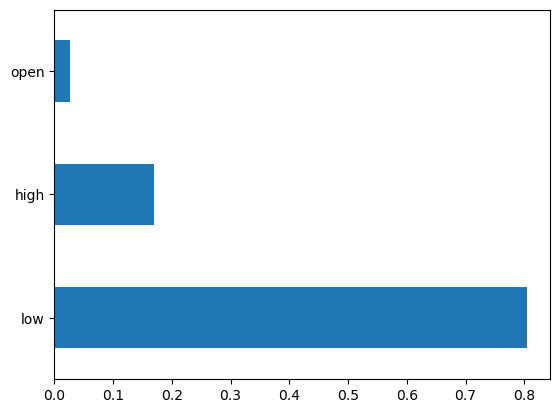

In [86]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['close']-TestingDataResults['Predictedclose']))/TestingDataResults['close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# K-Nearest Neighbor(KNN)

In [87]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['close']-TestingDataResults['Predictedclose']))/TestingDataResults['close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9998632274989424

##### Model Validation and Accuracy Calculations ##########
    open   high    low  close  Predictedclose
0  17.42  18.25  17.40  18.23            18.0
1  92.66  92.73  91.73  92.71            92.0
2  89.28  89.82  88.85  89.77            89.0
3  53.18  53.58  52.95  53.01            53.0
4  40.19  40.50  39.50  40.25            40.0
Mean Accuracy on test data: 98.99669052250817
Median Accuracy on test data: 99.30697178380721

Accuracy values for 10-fold Cross Validation:
 [98.80993439 98.98363445 99.42660587 99.33585507 90.65026552 99.43571529
 99.5190001  99.57406501 99.3123993  99.43115121]

Final Average Accuracy of the model: 98.45


# Support Vector Machine (SVM) Regressor

In [88]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['close']-TestingDataResults['Predictedclose']))/TestingDataResults['close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.999811339169736

##### Model Validation and Accuracy Calculations ##########
    open   high    low  close  Predictedclose
0  17.42  18.25  17.40  18.23            18.0
1  92.66  92.73  91.73  92.71            92.0
2  89.28  89.82  88.85  89.77            89.0
3  53.18  53.58  52.95  53.01            53.0
4  40.19  40.50  39.50  40.25            40.0
Mean Accuracy on test data: 99.09912187097696
Median Accuracy on test data: 99.35893587521728

Accuracy values for 10-fold Cross Validation:
 [98.80646629 99.14519676 99.51653598 99.44250406 62.60646141 99.54355284
 99.60306364 99.65955355 98.9061017  99.50420704]

Final Average Accuracy of the model: 95.67


# Model Deployment

In [95]:
# Separate Target Variable and Predictor Variables
TargetVariable='close'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['open', 'high', 'low']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(6639, 3)
(6639,)


# Cross validating the final model accuracy with less predictors

In [96]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [98.95198403 99.15691543 99.5142357  99.45834753 99.18057654 99.54186981
 99.6078107  99.67039986 99.52543805 99.55595336]

Final Average Accuracy of the model: 99.42


In [97]:
Final_LREG=RegModel.fit(X,y)

# Saving Model

In [98]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_LREG_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_LREG, fileWriteStream)
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\leosa


# Create a python function

In [99]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['open', 'high', 'low']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_LREG_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

In [100]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[40.98,60.55,35.3],[33.98,38.2,32.22]],columns=['open', 'high', 'low'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

    open   high    low
0  40.98  60.55  35.30
1  33.98  38.20  32.22


,Prediction
0,52.343753
1,36.019803


# Deployment

In [102]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_open , inp_high, inp_low):

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_open , inp_high, inp_low]],
     columns=['open', 'high', 'low'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_open=30.98,
                           inp_high=38.5,
                           inp_low=30.12
                             )

'{"Prediction":{"0":36.336042408}}'

# Web Deployment using Flask Library/Package
# Installing the flask library required to create the API

In [104]:
!pip install flask

In [105]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [106]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        Open_value = float(request.args.get('open'))
        High_value=float(request.args.get('high'))
        Low_value=float(request.args.get('low'))

        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_open=Open_value,
                                                       inp_high=High_value,
                                                       inp_low=Low_value
                                                )

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

In [107]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:9000
Press CTRL+C to quit


# Desktop Deployment

In [ ]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

class StockPredectionApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Starbuck Stok Price Predectoin')
        self.data = pd.read_csv("SBUX.US_D1.csv")
        self.sliders = []

        self.data.drop('datetime', axis=1, inplace=True)
        self.X = self.data.drop('close', axis=1).values
        self.y = self.data['close'].values

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        self.model = LinearRegression()
        self.model.fit(self.X_train, self.y_train)

        self.create_widgets()

    def create_widgets(self):
        for i, column in enumerate(self.data.columns[:-1]):
            label = tk.Label(self.master, text=column + ': ')
            label.grid(row=i, column=0)
            current_val_label = tk.Label(self.master, text='0.0')
            current_val_label.grid(row=i, column=2)
            slider = ttk.Scale(self.master, from_=self.data[column].min(), to=self.data[column].max(), orient="horizontal",
                               command=lambda val, label=current_val_label: label.config(text=f'{float(val):.2f}'))
            slider.grid(row=i, column=1)
            self.sliders.append((slider, current_val_label))

        predict_button = tk.Button(self.master, text='Predict Price', command=self.predict_price)
        predict_button.grid(row=len(self.data.columns[:-1]), columnspan=3)

    def predict_price(self):
        inputs = [float(slider.get()) for slider, _ in self.sliders]
        price = self.model.predict([inputs])
        messagebox.showinfo('Predicted Price', f'The predicted stok price is ${price[0]:.2f}')

if __name__ == '__main__':
    root = tk.Tk()
    app = StockPredectionApp(root)
    root.mainloop()